In [3]:
%matplotlib inline


# Edge operators


Edge operators are used in image processing within edge detection algorithms.
They are discrete differentiation operators, computing an approximation of the
gradient of the image intensity function.




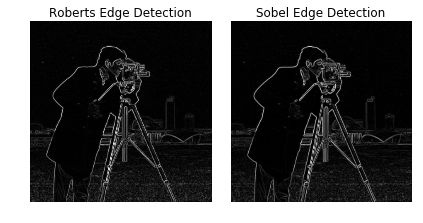

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import roberts, sobel, scharr, prewitt


image = camera()
edge_roberts = roberts(image)
edge_sobel = sobel(image)

fig, (ax0, ax1) = plt.subplots(ncols=2, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})

ax0.imshow(edge_roberts, cmap=plt.cm.gray)
ax0.set_title('Roberts Edge Detection')
ax0.axis('off')

ax1.imshow(edge_sobel, cmap=plt.cm.gray)
ax1.set_title('Sobel Edge Detection')
ax1.axis('off')

plt.tight_layout()

Different operators compute different finite-difference approximations of
the gradient. For example, the Scharr filter results in a less rotational
variance than the Sobel filter that is in turn better than the Prewitt
filter [1]_ [2]_ [3]_. The difference between the Prewitt and Sobel filters
and the Scharr filter is illustrated below with an image that is the
discretization of a rotation- invariant continuous function. The
discrepancy between the Prewitt and Sobel filters, and the Scharr filter is
stronger for regions of the image where the direction of the gradient is
close to diagonal, and for regions with high spatial frequencies. For the
example image the differences between the filter results are very small and
the filter results are visually almost indistinguishable.

.. [1] https://en.wikipedia.org/wiki/Sobel_operator#Alternative_operators

.. [2] B. Jaehne, H. Scharr, and S. Koerkel. Principles of filter design.
       In Handbook of Computer Vision and Applications. Academic Press,
       1999.

.. [3] https://en.wikipedia.org/wiki/Prewitt_operator



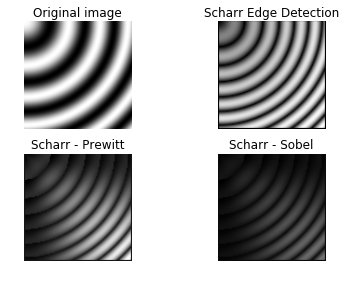

In [5]:
x, y = np.ogrid[:100, :100]
# Rotation-invariant image with different spatial frequencies
img = np.exp(1j * np.hypot(x, y)**1.3 / 20.).real

edge_sobel = sobel(img)
edge_scharr = scharr(img)
edge_prewitt = prewitt(img)

diff_scharr_prewitt = edge_scharr - edge_prewitt
diff_scharr_sobel = edge_scharr - edge_sobel
max_diff = np.max(np.maximum(diff_scharr_prewitt, diff_scharr_sobel))

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})

ax0.imshow(img, cmap=plt.cm.gray)
ax0.set_title('Original image')
ax0.axis('off')

ax1.imshow(edge_scharr, cmap=plt.cm.gray)
ax1.set_title('Scharr Edge Detection')
ax1.axis('off')

ax2.imshow(diff_scharr_prewitt, cmap=plt.cm.gray, vmax=max_diff)
ax2.set_title('Scharr - Prewitt')
ax2.axis('off')

ax3.imshow(diff_scharr_sobel, cmap=plt.cm.gray, vmax=max_diff)
ax3.set_title('Scharr - Sobel')
ax3.axis('off')

plt.tight_layout()
plt.show()